<h4>Import all necessary packages and modules</h4>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

<h4>Define the list of header names for the data</h4>

In [2]:
headers = ["f" + str(i) for i in range(1025)]
headers[1024] = "symbol"

<h4>Read in the training and test data 1</h4>

In [3]:
training_data = pd.read_csv("data-sets/train_1.csv", sep=",", header=0, names=headers)
testing_data = pd.read_csv("data-sets/test_with_label_1.csv", sep=",", header=0, names=headers)

<h4>Plot the distribution of the training and test data</h4>

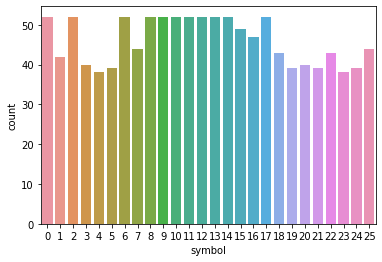

In [4]:
sns.countplot(training_data["symbol"])
plt.savefig("results/training1-dist.png")
plt.show()

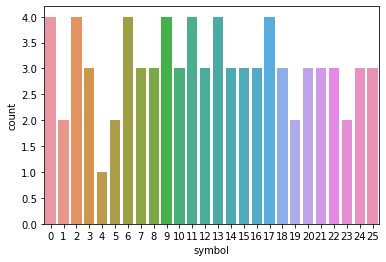

In [5]:
sns.countplot(testing_data['symbol'])
plt.savefig("results/testing1-dist.png")
plt.show()

<h4>Setup the training/testing features and targets using our imported data</h4>

In [6]:
X_training_features = training_data.drop("symbol", axis=1)
y_training_targets = training_data["symbol"]

In [7]:
X_testing_features = testing_data.drop("symbol", axis=1)
y_testing_targets = testing_data["symbol"]

<h4>Create the NaiveBayes model object with our training and testing data</h4>

In [8]:
gnb = GaussianNB()
gnb.fit(X_training_features, y_training_targets)
pred_gnb = gnb.predict(X_testing_features)

<h4>Output the performance into the csv result file</h4>

In [9]:
# The csv filename
gnb_results_filename = "results/naive-bayes/GNB-DS1.csv"

# The results (predictions)
gnb_results = np.arange(1, pred_gnb.shape[0])

# The confusion matrix
gnb_confusion_matrix = confusion_matrix(y_testing_targets, pred_gnb)
gnb_confusion_matrix_data_frame = pd.DataFrame(gnb_confusion_matrix).transpose()

# The classification report (accuracy, f1-score, etc...)
gnb_classification_report = classification_report(y_testing_targets, pred_gnb, output_dict=True)
gnb_classification_data_frame = pd.DataFrame(gnb_classification_report).transpose()

# Write each result [row,prediction] to the CSV file
# This will also create a new file
with open(gnb_results_filename, "w", newline="") as file:
    writer = csv.writer(file)    
    writer.writerow(["(a) Predicted Results:"])
    writer.writerow("")
    for i in zip(gnb_results, pred_gnb):
        writer.writerow([i])
        
# Append the confusion matrix to the CSV
with open(gnb_results_filename, "a", newline="") as file:
    writer = csv.writer(file)    
    writer.writerow("")
    writer.writerow(["(b) Confusion Matrix:"])
    writer.writerow("")
gnb_confusion_matrix_data_frame.to_csv(gnb_results_filename, mode="a")    
        
# Append the classification report to the CSV
with open(gnb_results_filename, "a", newline="") as file:
    writer = csv.writer(file)    
    writer.writerow("")
    writer.writerow(["(c) & (d) Performance Metrics:"])
    writer.writerow("")
gnb_classification_data_frame.to_csv(gnb_results_filename, mode="a")

<h4>Display classification metrics and confussion matrix</h4>

In [10]:
print(classification_report(y_testing_targets, pred_gnb))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.33      1.00      0.50         2
           2       1.00      0.75      0.86         4
           3       0.67      0.67      0.67         3
           4       0.00      0.00      0.00         1
           5       1.00      0.50      0.67         2
           6       0.67      0.50      0.57         4
           7       1.00      0.33      0.50         3
           8       1.00      1.00      1.00         3
           9       1.00      0.50      0.67         4
          10       0.50      0.33      0.40         3
          11       1.00      0.75      0.86         4
          12       0.29      0.67      0.40         3
          13       0.60      0.75      0.67         4
          14       1.00      1.00      1.00         3
          15       1.00      0.67      0.80         3
          16       0.60      1.00      0.75         3
          17       0.50    

In [11]:
print(gnb_confusion_matrix)

[[2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 

<h4>Read in the training and test data 2</h4>

In [12]:
training_data = pd.read_csv("data-sets/train_2.csv", sep=",", header=0, names=headers)
testing_data = pd.read_csv("data-sets/test_with_label_2.csv", sep=",", header=0, names=headers)

<h4>Plot the distribution of the training and test data</h4>

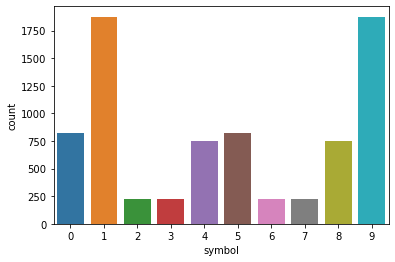

In [13]:
sns.countplot(training_data["symbol"])
plt.savefig("results/training2-dist.png")
plt.show()

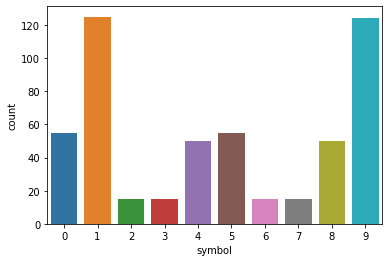

In [14]:
sns.countplot(testing_data['symbol'])
plt.savefig("results/testing2-dist.png")
plt.show()

<h4>Setup the training/testing features and targets using our imported data</h4>

In [15]:
X_training_features = training_data.drop("symbol", axis=1)
y_training_targets = training_data["symbol"]

In [16]:
X_testing_features = testing_data.drop("symbol", axis=1)
y_testing_targets = testing_data["symbol"]

<h4>Create the NaiveBayes model object with our training and testing data</h4>

In [17]:
gnb = GaussianNB()
gnb.fit(X_training_features, y_training_targets)
pred_gnb = gnb.predict(X_testing_features)

<h4>Output the performance into the csv result file</h4>

In [18]:
# The csv filename
gnb_results_filename = "results/naive-bayes/GNB-DS2.csv"

# The results (predictions)
gnb_results = np.arange(1, pred_gnb.shape[0])

# The confusion matrix
gnb_confusion_matrix = confusion_matrix(y_testing_targets, pred_gnb)
gnb_confusion_matrix_data_frame = pd.DataFrame(gnb_confusion_matrix).transpose()

# The classification report (accuracy, f1-score, etc...)
gnb_classification_report = classification_report(y_testing_targets, pred_gnb, output_dict=True)
gnb_classification_data_frame = pd.DataFrame(gnb_classification_report).transpose()

# Write each result [row,prediction] to the CSV file
# This will also create a new file
with open(gnb_results_filename, "w", newline="") as file:
    writer = csv.writer(file)    
    writer.writerow(["(a) Predicted Results:"])
    writer.writerow("")
    for i in zip(gnb_results, pred_gnb):
        writer.writerow([i])
        
# Append the confusion matrix to the CSV
with open(gnb_results_filename, "a", newline="") as file:
    writer = csv.writer(file)    
    writer.writerow("")
    writer.writerow(["(b) Confusion Matrix:"])
    writer.writerow("")
gnb_confusion_matrix_data_frame.to_csv(gnb_results_filename, mode="a")    
        
# Append the classification report to the CSV
with open(gnb_results_filename, "a", newline="") as file:
    writer = csv.writer(file)    
    writer.writerow("")
    writer.writerow(["(c) & (d) Performance Metrics:"])
    writer.writerow("")
gnb_classification_data_frame.to_csv(gnb_results_filename, mode="a")

<h4>Display classification metrics and confussion matrix</h4>

In [19]:
print(classification_report(y_testing_targets, pred_gnb))

              precision    recall  f1-score   support

           0       0.60      0.47      0.53        55
           1       0.93      0.89      0.91       125
           2       0.28      0.80      0.41        15
           3       0.34      0.93      0.50        15
           4       0.59      0.40      0.48        50
           5       0.76      0.62      0.68        55
           6       0.24      0.73      0.37        15
           7       1.00      0.93      0.97        15
           8       0.88      0.30      0.45        50
           9       0.77      0.73      0.75       124

    accuracy                           0.67       519
   macro avg       0.64      0.68      0.60       519
weighted avg       0.75      0.67      0.68       519



In [20]:
print(gnb_confusion_matrix)

[[ 26   4   1  14   8   1   0   0   1   0]
 [  6 111   1   6   0   1   0   0   0   0]
 [  0   0  12   0   1   0   0   0   1   1]
 [  1   0   0  14   0   0   0   0   0   0]
 [  2   0   1   6  20   2   4   0   0  15]
 [  0   0   1   1   1  34   8   0   0  10]
 [  3   1   0   0   0   0  11   0   0   0]
 [  0   1   0   0   0   0   0  14   0   0]
 [  1   2  26   0   0   0   5   0  15   1]
 [  4   1   1   0   4   7  17   0   0  90]]
